<a href="https://colab.research.google.com/github/shawnmuhr/BIOL_398/blob/main/HW_Solutions/biol300_hw5_solns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# make sure to include your imports here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 
    'axes.labelsize': 12, 
    'axes.titlesize': 12}
sns.set(rc=rc)

# Problem 1. Extracting information from a data frame (15 points)

Adapted from Chapter 9 of 'Computing Skills for Biologists' text.

We will be looking at data from Fauchald et al. (2017), in which they tracked the population size of various herds of caribou in North America over time, and correlated population cycling with the amount of vegetation and sea-ice cover. For now, we will just consider the population size alone. 

Note: Since this data is publicly hosted by the authors of the textbook, we can just link to this data as I show below (no need to mount your Google drive!). In general, I'm not hosting data publicly for this course unless I have explicit permission from the researchers who collected the data. But in this case, the authors of 'Computing Skills for Biologists' have already done that for us, so we are good to use these public links!

In [ ]:
path = "https://raw.githubusercontent.com/CSB-book/CSB/master/data_wrangling/data/FauchaldEtAl2017/pop_size.csv"
df = pd.read_csv(path, delimiter="\t")
df.head(10)

,Herd,Year,Pop_Size
0,WAH,1970,242000
1,WAH,1976,75000
2,WAH,1978,107000
3,WAH,1980,138000
4,WAH,1982,217863
5,WAH,1986,229000
6,WAH,1988,343000
7,WAH,1990,417000
8,WAH,1993,478822
9,WAH,1996,463000


A. Take a look at the structure of the data, and explain why the data are in fact tidy. That is, what is the 'observation' that constitutes each row?

B. Let's first get a sense of which years this study was conducted. Report the minimum and maximum value for `Year` in this data frame.

C. Let's also get a sense of how many herds of caribou they looked at. Report the number of differnet herd names that appear in this data frame. First approach this by looping through the values of `df["Herd"]` and keeping track of any new entries. Then as a shortcut, try using `df["Herd"].unique()` to make sure you ge tthe same answer.

D. List the three years with the largest population size for the herd called `WAH`.

E. For each herd, compute the average population size. Which herd is largest on average? Which herd is smallest on average? 

F. For each herd, we may want to get a sense of the population size by normalizing to the average for that herd. Add a new column called `Relative_Pop` that should be 1 when the population in that year is exactly as large as the mean population, a value of 2 if the population is twice the mean, 0.5 if it's half of the mean, etc.). To add a new column to a data frame, you can call somthing like:

> `df["new column names"] = values_of_intererst`



A. This data is tidy, because each row is an observation of a specific herd at a specific year. The column names contain the various variables used to describe the herds. 

B.

In [ ]:
print("Study runs from", df["Year"].min(), "to", df["Year"].max())

Study runs from 1970 to 2014


C. First, we will get the number of herds with the more verbose method:

In [ ]:
# initilize list to store herd names
herd_names = []

# loop through Herd column and add herd name to list if we haven't seen it yet
for herd in df["Herd"]:
  if herd not in herd_names:
    herd_names.append(herd)

# display number of herds
print("Number of unique herds:", len(herd_names))

Number of unique herds: 11


Now we can use the short-cut:

In [ ]:
num_herds = df["Herd"].unique()

# display number of herds
print("Number of unique herds:", num_herds)

Number of unique herds: ['WAH' 'CAH' 'TCH' 'PCH' 'CBH' 'BLW' 'BAT' 'QAM' 'LRH' 'GRH' 'BEV']


D. Below I show three different ways to approach this.

In [ ]:
# isolate just the WAH herd
df_WAH = df[df["Herd"] == "WAH"]

# use built in function to get top three
df_WAH.nlargest(3, "Pop_Size")

,Herd,Year,Pop_Size
11,WAH,2003,490000
8,WAH,1993,478822
9,WAH,1996,463000


In [ ]:
# sort by Pop Size and get last three values
df_WAH.sort_values(by="Pop_Size", ascending=False)[:3]

,Herd,Year,Pop_Size
11,WAH,2003,490000
8,WAH,1993,478822
9,WAH,1996,463000


In [ ]:
# grab population size values for WAH
WAH_pops = df_WAH["Pop_Size"].values

# sort populations and grab top three
top_three_pops = np.sort(WAH_pops)[::-1][:3]

# find the rows where the three top pop sizes can be found
for pop in top_three_pops:
  row = df_WAH[df_WAH["Pop_Size"]==pop]
  print(row, "\n")

   Herd  Year  Pop_Size
11  WAH  2003    490000 

  Herd  Year  Pop_Size
8  WAH  1993    478822 

  Herd  Year  Pop_Size
9  WAH  1996    463000 



E. For this I decided to make a new dataframe, although that wasn't required.

In [ ]:
# specify the column names we wish our dataframe to have
column_names = ["Herd", "Average_Pop"]

# instantiate data frame with those column name 
avgs_df = pd.DataFrame(columns = column_names)



new_row = {"Herd": "WAH", "Average_Pop": 1000}
avgs_df = avgs_df.append(new_row, ignore_index = True)

avgs_df

,Herd,Average_Pop
0,WAH,1000


In [ ]:
# specify the column names we wish our dataframe to have
column_names = ["Herd", "Average_Pop"]

# instantiate data frame with those column name 
avgs_df = pd.DataFrame(columns = column_names)

# loop through the list of herd names
for herd in herd_names:

  # look at just the herd of interest and calculate average pop size
  df_herd = df[df["Herd"] == herd]
  avg_pop = df_herd["Pop_Size"].mean()

  # construct row of information and add to df
  new_row = {"Herd": herd, "Average_Pop": avg_pop}
  avgs_df = avgs_df.append(new_row, ignore_index = True)

# take a look!
avgs_df

,Herd,Average_Pop
0,WAH,308895.687500
1,CAH,27504.818182
2,TCH,29155.545455
3,PCH,141853.846154
4,CBH,8121.875000
5,BLW,57650.500000
6,BAT,212715.833333
7,QAM,209851.222222
8,LRH,284571.428571
9,GRH,289731.000000


In [ ]:
# display largest and smallest herds
print( avgs_df.nlargest(1, "Average_Pop"))
print()
print( avgs_df.nsmallest(1, "Average_Pop"))

  Herd  Average_Pop
0  WAH  308895.6875

  Herd  Average_Pop
4  CBH     8121.875


## Problem 2. Making new data frames from exisiting data (20 points)

Adapted from Exercise 6.6.2 from 'Computing Skills for Biologists' text.

Fox et al. (2016) studied the effects on the outcome of papers of the genders
of the handling editors and reviewers. For the study, they compiled a database
including all the submissions to the journal Functional Ecology from 2004 to
2014 . Their data are reported in the link below. Besides the effects
of gender and bias in journals, the data can be used to investigate whether
manuscripts having more reviewers are more likely to be rejected.

A. Import the data using pandas, take a look at the structure of the data, and explain why its tidy. 

In [ ]:
path = 'https://raw.githubusercontent.com/CSB-book/CSB/master/scientific/data/Fox2015_data.csv'
df = pd.read_csv(path)
df.head()

,MsID,Year,HandlingEditorSex,ReviewerSex,ReviewerRegion,ReviewerInvited,ReviewerAgreed,ReviewerScore,FinalDecision
0,1,2004,m,m,Oceania,1,1,1,1
1,1,2004,m,m,NorthAmerica,1,1,0,1
2,2,2004,m,m,NorthAmerica,1,1,2,1
3,2,2004,m,m,0,1,1,2,1
4,3,2004,m,m,Europe,1,1,2,0


A. Thesr data are tidy because each row corresponds to an observation of a single reviewer. 

B. For each manuscript (i.e. unique MsID), count the number of reviewers there were (where ReviewerAgreed equals `1`). Save this information as a new data frame, with columns `MsID` and `NumberReviewers`, as well as the corresponding `FinalDecision` column. This new data frame contains information on a manuscript basis, rather than a reviewer basis. This will be helpful as we are trying to assess how number of reviewers relates to the rate of rejection.

As a tip, below I show how you can make a new data frame by specifiying the column names and then appending a row of data to the otherwise empty dataframe.

In [ ]:
# specify the column names we wish our dataframe to have
column_names = ["MsID", "NumberReviewers", "FinalDecision"]

# instantiate data frame with those column name 
df_ms = pd.DataFrame(columns = column_names)

# get all possible manuscript IDs
ids = df["MsID"].unique()

# loop through ids
for id in ids:
  # get number reviewers and final decision info for this id
  df_id = df[df["MsID"]==id]
  num_reviewers = len(df_id[df_id["ReviewerAgreed"]==1])
  fin_dec = df_id["FinalDecision"].values[0]

  # consturct row of info to add to our data frame
  new_row = {"MsID": id, "NumberReviewers": num_reviewers, "FinalDecision": fin_dec} 
  df_ms = df_ms.append(new_row, ignore_index = True)

df_ms.head()

,MsID,NumberReviewers,FinalDecision
0,1,2,1
1,2,2,1
2,3,2,0
3,4,2,1
4,5,2,1


C. With this data frame from part (B), we can now assess if/how the rate of rejection changes with the number of reviewers. The column `FinalDecision` contains `1` for rejection, and `0` for acceptance. Compile a table measuring the probability of rejection given the number of reviewers, including information about how many manuscripts had a given number of reviewers. Save this information in a final data frame, with columns `NumberReviewers` and `NumberManuscripts` and `RejectionRate`.

Let's first get a sense of the number of possible reviews there can be. Seems that there were anywhere from 0 to 5 reviewers for the various manuscripts.

In [ ]:
reviewer_nums = df_ms["NumberReviewers"].unique()
reviewer_nums

array([2, 0, 3, 1, 4, 5], dtype=object)

In [ ]:
# specify the column names we wish our dataframe to have
column_names = ["NumberReviewers", "NumberManuscripts", "RejectionRate"]

# instantiate data frame with those column name 
df_final = pd.DataFrame(columns = column_names)

# loop through possible number of reviewers
for i in range(6):

  # look at the previous df, but only with appropriate number of reviewers 
  df_i = df_ms[df_ms["NumberReviewers"]==i]

  # grab all the relevent info from the df
  num_manus = len(df_i)
  num_rejected = df_i["FinalDecision"].sum()
  perc_rejected = num_rejected / num_manus

  # consturct row of info to add to our data frame
  new_row = {"NumberReviewers": i, "NumberManuscripts": num_manus, "RejectionRate": perc_rejected} 
  df_final = df_final.append(new_row, ignore_index = True)

df_final

,NumberReviewers,NumberManuscripts,RejectionRate
0,0.0,2875.0,0.977739
1,1.0,91.0,0.527473
2,2.0,2667.0,0.685039
3,3.0,1012.0,0.673913
4,4.0,72.0,0.708333
5,5.0,3.0,1.000000


D. Display your final data frame. Do you think having more reviewers increase the probability of being rejected?

There seems to be some dependence on the number of reviewers and the rate of rejection. With the exception of when there are 0 reviewers, the rate of rejection seems does seem to roughly increase with the number of reviewers. It perhaps makes sense that if an editor were unable to get any reviewers, they would just reject that manuscript outright. Additionally, not too much weight should be placed on the rejection rate when there are five reviewers, as that only applies to 3 manuscripts. Of the remaining possible number of reviewers, it seems the rate of rejection increases from 52% to 70%, although 2, 3, and 4 reviewers are all fairly similar and we would have to do additional testing to see if these changes are significant. 

# Problem 3. Recreating a plot (15 points)

Adapted from Exercise 9.8.1 from 'Computing Skills for Biologists' text.

Martin (2015) studied songbirds in temperate and tropical environments. He
showed [in this figure](https://github.com/CSB-book/CSB/blob/master/data_wrangling/data/Martin2015_figure2.pdf) (panel A) that peak growth rate is higher in species suffering higher nest predation risk, and is lower in tropical species with the same level of risk as temperate species. In that same figure (panel B) he reported that nestling period covaries with growth rate, with tropical species having shorter nestling periods (for the same growth rate) than temperate species.

Regretably, the column names in the data file are are hard to interpret, but I was able to track down the following descriptions for each of the comlumns:

- species – Genus_species 
- nstldpr – daily nest predation rate during the nestling period 
- nstl – length of the nestling period (hatch to fledge in d) 
- krate – traditional estimate of peak growth rate (Ki) for mass 
- kwing – traditional estimate of peak growth rate (Ki) for wings
- PropWCfldg – Proportion of adult size for wing chord length at fledging  
- Propmassfldg – Proportion of adult mass for nestling mass at fledging 
- trips – total number of feeding trips/hr 
- tripsnstl – number of feeding trips/hr/nestling 
- cs – clutch size (number of eggs) amort – arcsin-transformed annual adult mortality probability 
- lmas – log-transformed body mass 
- aerial – aerial foragers = 1, others = 0 
- regurg – parents that feed by regurgitation = 1, others = 0 
- site – field site of data collection; 1 = Arizona, 2 = Venezuela, 3 = Malaysia

A. It turns out that these data are not in a good format for making scatterplots directly. Specifically, the `nstldpr` column has some empty entries, and these values are saved as strings. Using the data as it is loaded in below, *try* to make a scatter plot of `nstldpr` and `krate`. Explain what is going on with the x-axis.


In [ ]:
path = 'https://raw.githubusercontent.com/CSB-book/CSB/master/data_wrangling/data/Martin2015_data.csv'
df = pd.read_csv(path, delimiter="\t")
df.head()

,species,nstldpr,nstl,krate,kwing,PropWCfldg,Propmassfldg,trips,tripsnstl,cs,armort,lmas,aerial,regurg,site
0,Empidonax_occidentalis,0.0302,15.04500,0.427354,0.281768,0.690398602,1.052977891,19.947,6.136,3.88,0.412608196,1.037426,1,0,1
1,Vireo_plumbeus,0.0422,13.40000,0.475550,0.307878,,,7.104,2.921,3.26,,1.225309,0,0,1
2,Vireo_gilvus,0.0216,13.43700,0.490115,0.272989,0.652174219,0.98560322,10.903,3.502991666,3.66,0.500957533,1.099076,0,0,1
3,Parus_gambeli,0.007380891,21.35714,0.359629,0.230178,0.850060729,1.059196755,19.818,3.768,6.58,0.517834832,1.062556,0,0,1
4,Turdus_migratorius,0.0301,14.66700,0.499906,0.316170,0.604293192,0.785692109,6.229,1.884,3.34,0.502935942,1.888179,0,0,1


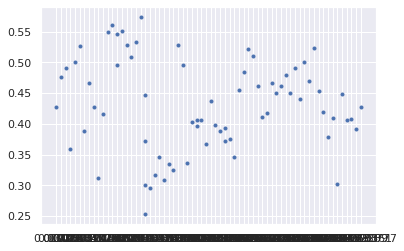

In [ ]:
plt.plot(df["nstldpr"],df["krate"],'.')

Each `nstldpr` value is being treated as a category (like Frog I, Frog II, etc.) rather than a numerical value. This causes each data point to get it's own x-axis label, which causes the labels to overlap. Even worse, since these are just being treated as category, the position _along_ the x-axis has no meaning to the actual numerical value.

B. Fill in the comments for the code below, explaining how I was able to clean up the nstldpr column. You may need to look up some of these function to understand what they are doing.

In [ ]:
# replace empty entries with "not a number" value
df.replace(" ", np.nan, inplace=True)

# drop rows with this "not a number" value in the nest predation rate column 
df.dropna(subset = ["nstldpr"], inplace=True)

# convert strings to numbers
df["nstldpr"] = df["nstldpr"].astype(float)

df.head()

,species,nstldpr,nstl,krate,kwing,PropWCfldg,Propmassfldg,trips,tripsnstl,cs,armort,lmas,aerial,regurg,site
0,Empidonax_occidentalis,0.030200,15.04500,0.427354,0.281768,0.690398602,1.052977891,19.947,6.136,3.88,0.412608196,1.037426,1,0,1
1,Vireo_plumbeus,0.042200,13.40000,0.475550,0.307878,NaN,NaN,7.104,2.921,3.26,NaN,1.225309,0,0,1
2,Vireo_gilvus,0.021600,13.43700,0.490115,0.272989,0.652174219,0.98560322,10.903,3.502991666,3.66,0.500957533,1.099076,0,0,1
3,Parus_gambeli,0.007381,21.35714,0.359629,0.230178,0.850060729,1.059196755,19.818,3.768,6.58,0.517834832,1.062556,0,0,1
4,Turdus_migratorius,0.030100,14.66700,0.499906,0.316170,0.604293192,0.785692109,6.229,1.884,3.34,0.502935942,1.888179,0,0,1


C. Finally, with this cleaned up data, recreate the scatter plots in the figure. Note, these plots were made in a different programming language, so don't worry about making it look exactly the same. In fact, use this opportunity to make your own decisions about how to represent the data. For now, don't worry about computing or displying the trendlines -- we will learn how to do that later!

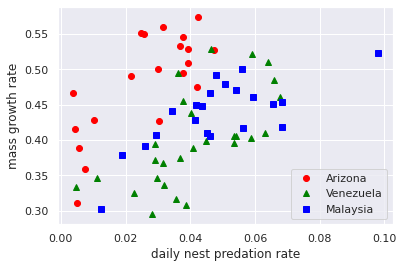

In [ ]:
# slice out the three sites
site1 = df[df["site"] == 1]
site2 = df[df["site"] == 2]
site3 = df[df["site"] == 3]

# plot the three scatter plots
plt.plot(site1["nstldpr"], site1["krate"], 'o', color="red")
plt.plot(site2["nstldpr"], site2["krate"], '^', color="green")
plt.plot(site3["nstldpr"], site3["krate"], 's', color="blue")

# add labels 
plt.xlabel("daily nest predation rate")
plt.ylabel("mass growth rate")
plt.legend(["Arizona", "Venezuela", "Malaysia"]);

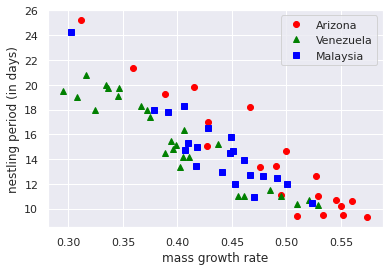

In [ ]:
# plot the three scatter plots
plt.plot(site1["krate"], site1["nstl"], 'o', color="red")
plt.plot(site2["krate"], site2["nstl"], '^', color="green")
plt.plot(site3["krate"], site3["nstl"], 's', color="blue")

# add labels
plt.xlabel("mass growth rate")
plt.ylabel("nestling period (in days)")
plt.legend(["Arizona", "Venezuela", "Malaysia"]);

Note: some data points are missing from the original plot since we removed the rows with empty entries in the `nstldpr` column, although the entries in the other columns may have been valid. 

## Problem 4. Making your own plots (30 points)

Adapted from Exercise 9.8.2 from 'Computing Skills for Biologists' text.

Bolstad et al. (2015) studied the allometric relationships between wing length
of Drosophilidae and the length of the L2 vein that runs across the wing.
They measured more than 20,000 individuals, belonging to 111 species.

A. Produce a scatter plot for how the log of wing size relates to the log of L2 length. (The values in the table are already the logged values, but they are not labeled as such). Color the data points by the sex of the files. 

B. From your plot, what do you conclude about the relationship between wing size and L2 vein length? Are there any noticeable difference between male and female flies?

C. Add two columns to the data frame, where you will store the linear values of wing size and L2 length. Specifically, used `np.exp()` to exponentiate the values from the original columns. 

D. Reproduce your plot from part B, this time with these linearized values.

E. What do you think was the value of plotting the log values instead?

F. From your exploration so far, is there a trait you think varies between male and female flies? Make a plot to compare a trait of interest as it depends on the `Sex` category of the data frame and comment on what you conclude. Explain why you chose the plot type that you did. (Hint: No bar graphs!)

In [ ]:
path = "https://raw.githubusercontent.com/CSB-book/CSB/master/data_wrangling/data/Bolstad2015_data.csv"
df = pd.read_csv(path)
df.head()

,Species,ID,Date,Sex,WingSize,L2Length
0,D_acutila,ACU1006.TIF,24_Jul_01,F,0.131122,0.497262
1,D_acutila,ACU1009.TIF,24_Jul_01,F,0.136088,0.487972
2,D_acutila,ACU1010.TIF,24_Jul_01,F,0.195393,0.540137
3,D_acutila,ACU1013.TIF,24_Jul_01,F,0.277329,0.646360
4,D_acutila,ACU1018.TIF,24_Jul_01,F,0.151531,0.497758


A.

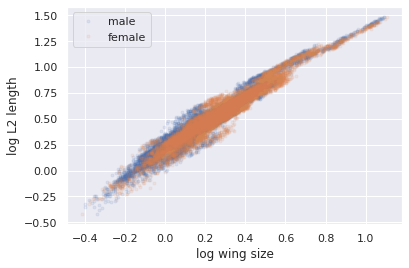

In [ ]:
df_M = df[df["Sex"] == "M"]
df_F = df[df["Sex"] == "F"]

plt.plot(df_M["WingSize"], df_M["L2Length"], '.', alpha=0.1)
plt.plot(df_F["WingSize"], df_F["L2Length"], '.', alpha=0.1)
plt.xlabel("log wing size")
plt.ylabel("log L2 length")
plt.legend(["male","female"]);

B. There is a very clear, positive relationship between wing size and L2 length. It seems that the wing size might be a but larger in females, but it's hard to tell with the sheer number of data points here.

C.

In [ ]:
# add linear values to the data frame
df["LinearWingSize"] = np.exp(df["WingSize"])
df["LinearL2Length"] = np.exp(df["L2Length"])

df.head()

,Species,ID,Date,Sex,WingSize,L2Length,LinearWingSize,LinearL2Length
0,D_acutila,ACU1006.TIF,24_Jul_01,F,0.131122,0.497262,1.140107,1.644213
1,D_acutila,ACU1009.TIF,24_Jul_01,F,0.136088,0.487972,1.145783,1.629009
2,D_acutila,ACU1010.TIF,24_Jul_01,F,0.195393,0.540137,1.215789,1.716241
3,D_acutila,ACU1013.TIF,24_Jul_01,F,0.277329,0.646360,1.319600,1.908580
4,D_acutila,ACU1018.TIF,24_Jul_01,F,0.151531,0.497758,1.163615,1.645029


D.

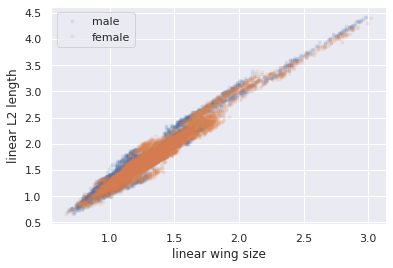

In [ ]:
df_M = df[df["Sex"] == "M"]
df_F = df[df["Sex"] == "F"]

plt.plot(df_M["LinearWingSize"], df_M["LinearL2Length"], '.', alpha=0.1)
plt.plot(df_F["LinearWingSize"], df_F["LinearL2Length"], '.', alpha=0.1)

plt.xlabel("linear wing size")
plt.ylabel("linear L2 length")
plt.legend(["male","female"]);

E. While it can be useful to plot on a log scale when the values of interest span many orders of magnitude, these data are not that spread out. This means the resulting plots don't look all too different from each other. In this case, I would likely stick with the linear values, as they are more intuitive. 

F. Let's see if the wing size is in fact larger in female files. Due to the large number of datapoints, I will opt for an ECDF since even a strip plot would be very crowded.

In [ ]:
def ecdf(data):
    """Generate x and y values for plotting an ECDF."""
    x_vals = np.sort(data)
    y_vals = np.arange(1, len(data)+1) / len(data)
    
    return x_vals, y_vals

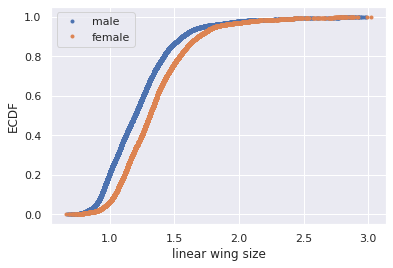

In [ ]:
f_x, f_y = ecdf(df_F["LinearWingSize"])
m_x, m_y = ecdf(df_M["LinearWingSize"])

plt.plot(m_x, m_y, '.')
plt.plot(f_x, f_y, '.')
plt.xlabel("linear wing size")
plt.ylabel("ECDF")
plt.legend(["male","female"]);

From this plotting, it's a lot easier to see that the female wing size is in fact a bit bigger, as evidenced by the orange curve being shifted to the right. 

# How long did this take? 

With a new course and new assignments, I want to be conscientious with how much time this course takes. Please let me know how long this took, so I can adjust future homeworks if needed.

# References

If you referenced any external sources for completing this homework, please list them below. (Just the links are fine.)

# Submitting your homework

Please make sure to state what each group member contribute and have each group member "sign off" that they agree they are satisfied with the final submission of this homework.

You will submit this homework via GitHub. Unless you have an approved extension or opt to submit the homework late (with a 10% deduction per day), your homework will be graded based on what is submitted on GitHub at the time of the deadline. So don't forget to push! 